# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 609


In [3]:
cities

['aasiaat',
 'port elizabeth',
 'dudinka',
 'marsh harbour',
 'kill devil hills',
 'kamaishi',
 'ajdabiya',
 'mao',
 'yaren',
 'port-aux-francais',
 'lebu',
 'jinchang',
 'iqaluit',
 'college',
 'lompoc',
 'san patricio',
 'waitangi',
 'daru',
 'margaret river',
 'zhaqsy',
 'udachny',
 'puerto ayora',
 'rongelap',
 'san antonio de pale',
 'waddan',
 'hithadhoo',
 'whitehorse',
 'avarua',
 'hirara',
 'turkmenbasy',
 'luderitz',
 'yeppoon',
 'la mira',
 'isangel',
 'mahajanga',
 'tsiombe',
 'port mathurin',
 'thompson',
 'wailua homesteads',
 'adamstown',
 'albany',
 'rockland',
 'invercargill',
 'tiksi',
 'olonkinbyen',
 'hermanus',
 'hawaiian paradise park',
 'taiohae',
 'ilulissat',
 'katabu',
 'blackmans bay',
 'okhotsk',
 'santarem',
 'colonia',
 'puerto natales',
 'west island',
 'jamestown',
 'le port',
 'nouadhibou',
 'ola',
 'namibe',
 'port alfred',
 'edinburgh of the seven seas',
 'tazovsky',
 "st. john's",
 'port pirie',
 'saipan',
 'san carlos de bariloche',
 'papatowai',
 '

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = f'https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'https://api.openweathermap.org/data/2.5/weather?q={city}&appid=9215ef817a3bfbdc4177d4247f41fbcb&units=metric'
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | aasiaat
Processing Record 2 of Set 1 | port elizabeth
Processing Record 3 of Set 1 | dudinka
Processing Record 4 of Set 1 | marsh harbour
Processing Record 5 of Set 1 | kill devil hills
Processing Record 6 of Set 1 | kamaishi
Processing Record 7 of Set 1 | ajdabiya
Processing Record 8 of Set 1 | mao
Processing Record 9 of Set 1 | yaren
Processing Record 10 of Set 1 | port-aux-francais
Processing Record 11 of Set 1 | lebu
Processing Record 12 of Set 1 | jinchang
Processing Record 13 of Set 1 | iqaluit
Processing Record 14 of Set 1 | college
Processing Record 15 of Set 1 | lompoc
Processing Record 16 of Set 1 | san patricio
Processing Record 17 of Set 1 | waitangi
Processing Record 18 of Set 1 | daru
Processing Record 19 of Set 1 | margaret river
Processing Record 20 of Set 1 | zhaqsy
Processing Record 21 of Set 1 | udachny
Processing Record 22 of Set 1 | puerto ayora
Processing Record 23 of Set 1 

In [12]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          585
Lat           585
Lng           585
Max Temp      585
Humidity      585
Cloudiness    585
Wind Speed    585
Country       585
Date          585
dtype: int64

In [13]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,aasiaat,68.7098,-52.8699,-6.77,77,100,2.56,GL,1713561329
1,port elizabeth,-33.9180,25.5701,18.51,95,20,1.03,ZA,1713561329
2,dudinka,69.4058,86.1778,-9.62,96,100,3.13,RU,1713561329
3,marsh harbour,26.5412,-77.0636,23.87,66,63,3.41,BS,1713561330
4,kill devil hills,36.0307,-75.6760,18.00,86,100,3.60,US,1713561330


In [14]:
# Export the City_Data into a csv
city_data_df.to_csv("../cities.csv", index_label="City_ID")

In [15]:
# Read saved data
city_data_df = pd.read_csv("../cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,aasiaat,68.7098,-52.8699,-6.77,77,100,2.56,GL,1713561329
1,port elizabeth,-33.9180,25.5701,18.51,95,20,1.03,ZA,1713561329
2,dudinka,69.4058,86.1778,-9.62,96,100,3.13,RU,1713561329
3,marsh harbour,26.5412,-77.0636,23.87,66,63,3.41,BS,1713561330
4,kill devil hills,36.0307,-75.6760,18.00,86,100,3.60,US,1713561330


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

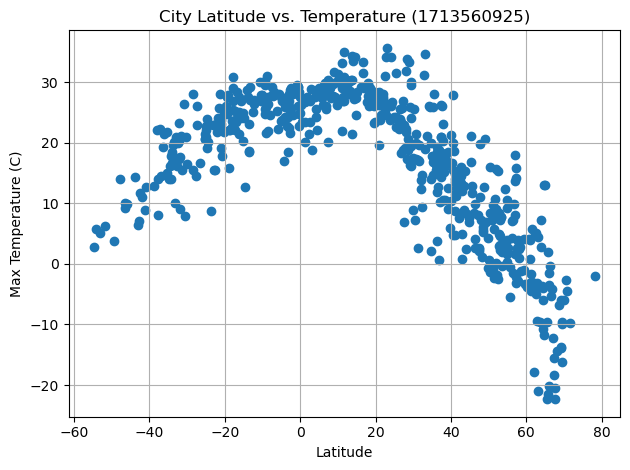

In [18]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'], marker='o')

# Incorporate the other graph properties
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
date=city_data_df['Date'].min()
plt.title(f"City Latitude vs. Temperature ({date})")
plt.tight_layout()

# Save the figure
plt.savefig("../Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

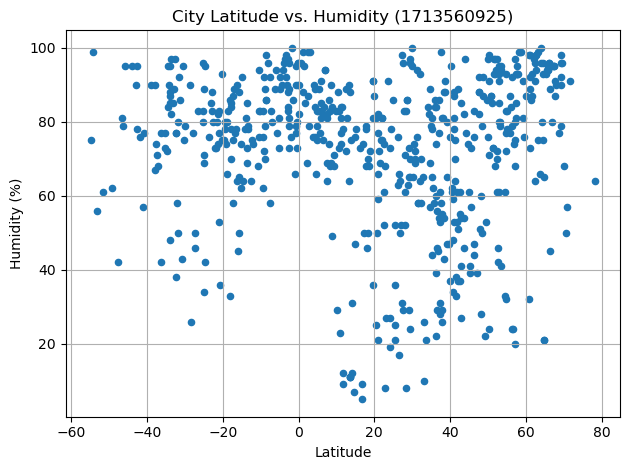

In [19]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot(kind='scatter', x='Lat', y='Humidity', marker='o', grid=True,\
                title=f'City Latitude vs. Humidity ({date})')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs. Humidity ({date})")
plt.tight_layout()

# Save the figure
plt.savefig("../Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

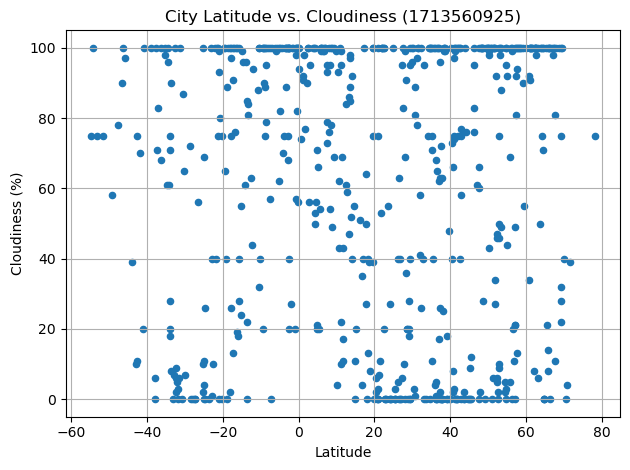

In [20]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot(kind='scatter', x='Lat', y='Cloudiness', marker='o', grid=True,\
                  title=f'City Latitude vs. Cloudiness ({date})')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Latitude vs. Cloudiness ({date})")
plt.tight_layout()

# Save the figure
plt.savefig("../Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

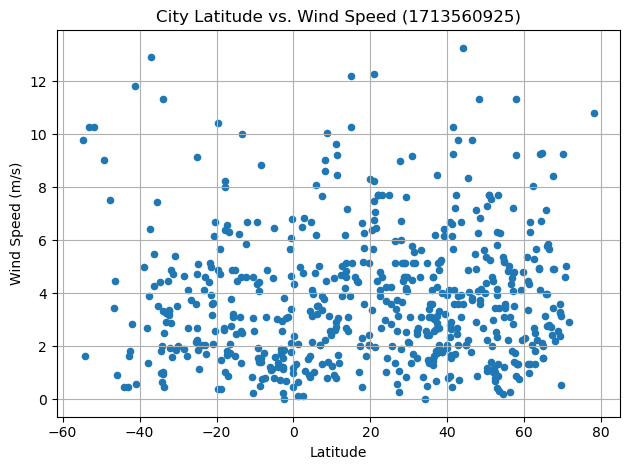

In [21]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot(kind='scatter', x='Lat', y='Wind Speed', marker='o', grid=True,\
                  title=f'City Latitude vs. Wind Speed ({date})')


# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title(f"City Latitude vs. Wind Speed ({date})")
plt.tight_layout()

# Save the figure
plt.savefig("../Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [22]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat']>= 0,:]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,aasiaat,68.7098,-52.8699,-6.77,77,100,2.56,GL,1713561329
2,dudinka,69.4058,86.1778,-9.62,96,100,3.13,RU,1713561329
3,marsh harbour,26.5412,-77.0636,23.87,66,63,3.41,BS,1713561330
4,kill devil hills,36.0307,-75.6760,18.00,86,100,3.60,US,1713561330
5,kamaishi,39.2667,141.8833,9.01,80,18,3.21,JP,1713561330


In [23]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat']<= 0,:]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,port elizabeth,-33.9180,25.5701,18.51,95,20,1.03,ZA,1713561329
8,yaren,-0.5472,166.9160,29.11,73,82,4.66,NR,1713561331
9,port-aux-francais,-49.3500,70.2167,3.83,62,58,9.02,TF,1713561331
10,lebu,-37.6167,-73.6500,14.00,74,100,3.88,CL,1713561332
16,waitangi,-43.9535,-176.5597,14.34,95,39,0.45,NZ,1713561333


###  Temperature vs. Latitude Linear Regression Plot

Linear equation: y = -0.58x + 35.79
The r-value is: -0.8711659176516842


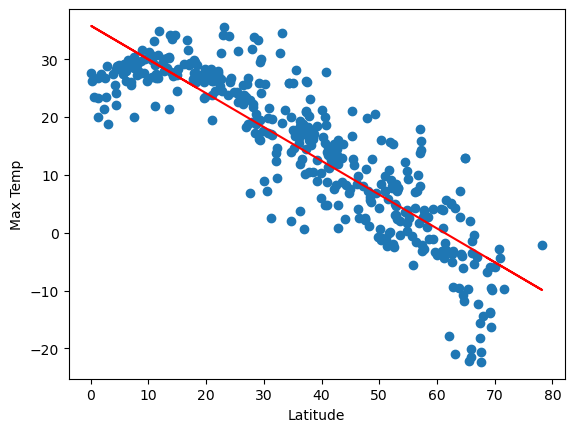

In [25]:
# Linear regression on Northern Hemisphere
plt.scatter(northern_hemi_df['Lat'],northern_hemi_df['Max Temp'], marker='o')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temp")

# Define a function to create Linear Regression plots
def lr_funcV2(x,y,name,vbl,hemi):
    (slope,intercept,rvalue,pvalue,stderror)=linregress(x,y)
    reg_values= x*slope + intercept
    plt.plot(x,reg_values,color='r')
    plt.xlabel('Latitude')
    plt.ylabel('Max Temp')
    line_eq = f'y = {(round(slope,2))}x + {(round(intercept,2))}'
    print(f'Linear equation: {line_eq}')
    plt.savefig(f"../LinearRegresion_{name}.png")
    print(f'The r-value is: {rvalue}')

x = northern_hemi_df['Lat']
y = northern_hemi_df['Max Temp']
name = 'NH_LatVsMaxTemp'
vbl = 'Maximum Temperature C°'
hemi = 'Northern Hemisphere'
lr_funcV2(x,y,name,vbl,hemi)
plt.show()

KeyError: 'vbl'

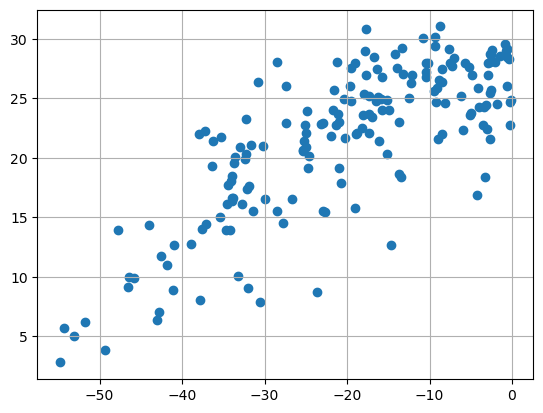

In [29]:
# Linear regression on Southern Hemisphere
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'], marker='o')

# Incorporate the other graph properties
plt.grid()
x = southern_hemi_df['Lat']
y = southern_hemi_df['vbl']
name = 'SH_LatVsMaxTemp'
vbl = 'Maximum Temperature C°'
hemi = 'Southern Hemisphere'
lr_funcV2(x,y,name,vbl,hemi)
plt.show()

**Discussion about the linear relationship:** There is a strong relationship between latitude and maximum temperature. In the Northern Hemisphere, it is a negative correlation, while in the Southern Hemisphere, it is a positive correlation. Maximum Temperature increases as we approach the equator.

### Humidity vs. Latitude Linear Regression Plot

Linear equation: y = 0.18x + 62.84
The r-value is: 0.15221591299454998


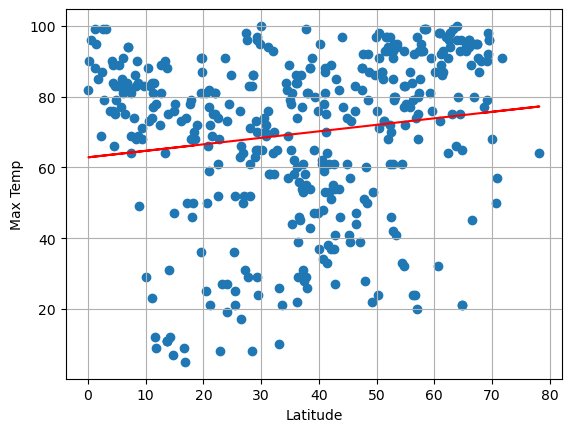

In [31]:
# Northern Hemisphere
plt.scatter(northern_hemi_df['Lat'],northern_hemi_df['Humidity'], marker='o')

# Incorporate the other graph properties
plt.grid()

# Linear regression on Northern Hemisphere
x = northern_hemi_df['Lat']
y = northern_hemi_df['Humidity']
name = 'NH_LatVsHumidity'
vbl = 'Humidity'
hemi = 'Northern Hemisphere'
lr_funcV2(x,y,name,vbl,hemi)
plt.show()

Linear equation: y = 0.25x + 82.99
The r-value is: 0.22518787946431323


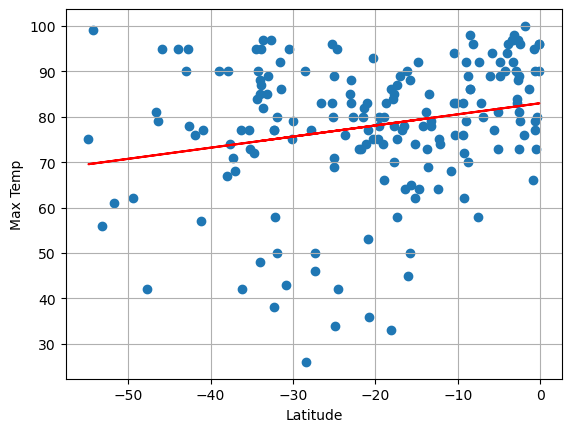

In [32]:
# Southern Hemisphere
plt.scatter(southern_hemi_df['Lat'],southern_hemi_df['Humidity'], marker='o')

plt.grid()

x = southern_hemi_df['Lat']
y = southern_hemi_df['Humidity']
name = 'SH_LatVsHumidity'
vbl = 'Humidity (%)'
hemi = 'Southern Hemisphere'
lr_funcV2(x,y,name,vbl,hemi)
plt.show()

### Cloudiness vs. Latitude Linear Regression Plot

Linear equation: y = 0.04x + 56.76
The r-value is: 0.0168035715411098


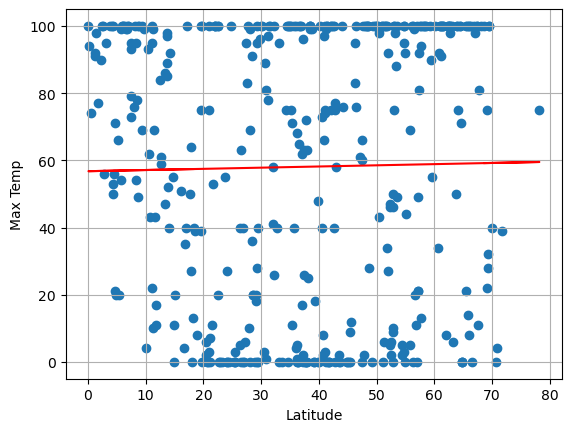

In [33]:
# Northern Hemisphere
plt.scatter(northern_hemi_df['Lat'],northern_hemi_df['Cloudiness'], marker='o')

plt.grid()

x = northern_hemi_df['Lat']
y = northern_hemi_df['Cloudiness']
name = 'NH_LatVsCloudiness'
vbl = 'Cloudiness (%)'
hemi = 'Northern Hemisphere'
lr_funcV2(x,y,name,vbl,hemi)
plt.show()

Linear equation: y = 0.73x + 78.32
The r-value is: 0.26322781149957797


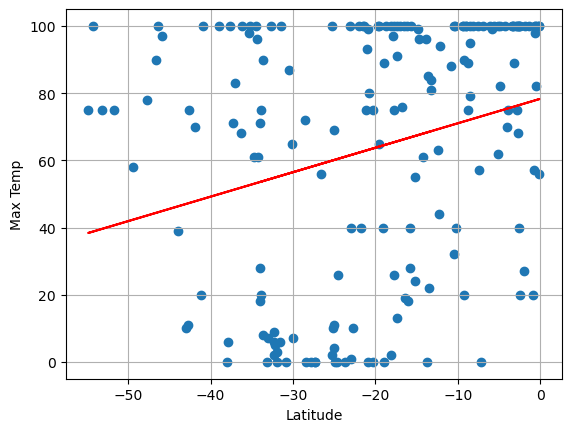

In [34]:
# Southern Hemisphere
plt.scatter(southern_hemi_df['Lat'],southern_hemi_df['Cloudiness'], marker='o')

plt.grid()

x = southern_hemi_df['Lat']
y = southern_hemi_df['Cloudiness']
name = 'SH_LatVsCloudiness'
vbl = 'Cloudiness (%)'
hemi = 'Southern Hemisphere'
lr_funcV2(x,y,name,vbl,hemi)
plt.show()

### Wind Speed vs. Latitude Linear Regression Plot

Linear equation: y = -0.0x + 3.98
The r-value is: -0.003226085339506981


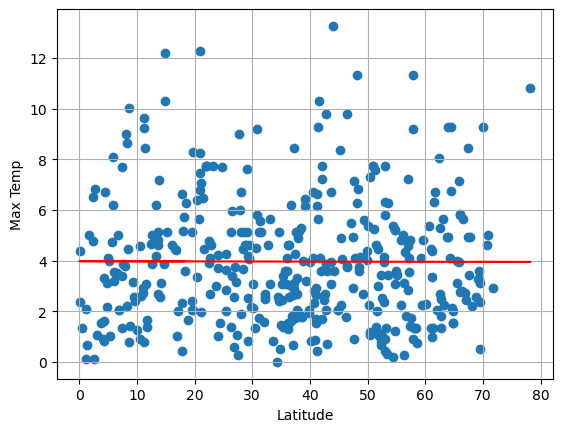

In [35]:
# Northern Hemisphere
plt.scatter(northern_hemi_df['Lat'],northern_hemi_df['Wind Speed'], marker='o')

plt.grid()

x = northern_hemi_df['Lat']
y = northern_hemi_df['Wind Speed']
name = 'NH_LatVsWindSpeed'
vbl = 'Wind Speed (m/s)'
hemi = 'Northern Hemisphere'
lr_funcV2(x,y,name,vbl,hemi)
plt.show()

Linear equation: y = -0.05x + 2.49
The r-value is: -0.25894159627687247


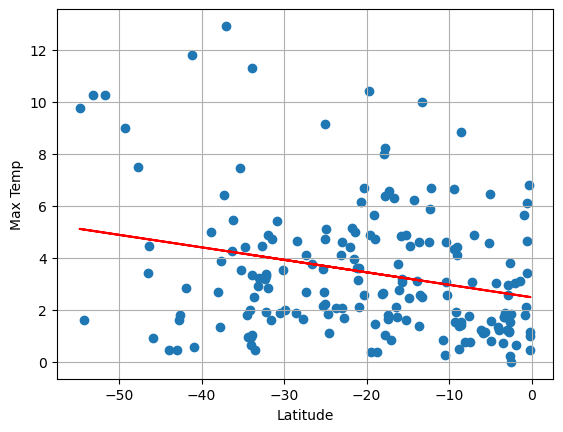

In [36]:
# Southern Hemisphere
plt.scatter(southern_hemi_df['Lat'],southern_hemi_df['Wind Speed'], marker='o')

plt.grid()

x = southern_hemi_df['Lat']
y = southern_hemi_df['Wind Speed']
name = 'SH_LatVsWindSpeed'
vbl = 'Wind Speed (m/s)'
hemi = 'Southern Hemisphere'
lr_funcV2(x,y,name,vbl,hemi)
plt.show()